In [49]:
# Dependencies
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn import datasets


# CovidActNow API Key
from config import api_key
# Census API Key
from config import census_key

In [2]:
# Create State population dataframe

# Specify the Census URL
census_url = "https://api.census.gov/data/2021/pep/population?"
# Build Census Pops by state query URL
census_query_url = f"{census_url}get=DENSITY_2021,POP_2021,NAME,STATE&for=state:*&key={census_key}"

In [3]:
census_query_url

'https://api.census.gov/data/2021/pep/population?get=DENSITY_2021,POP_2021,NAME,STATE&for=state:*&key=245cff33f390135e0c12d81cb2d0d9cb438adcb1'

In [4]:
# Make state pops data request and save to a dataframe
pops_response = requests.get(census_query_url)
pops_json = pops_response.json()
row_counter = len(pops_json)
pops_data = []
for row in range(1, row_counter):
    pops_data.append(pops_json[row])
pops_data_df = pd.DataFrame(pops_data, columns = pops_json[0])

In [5]:
pops_data_df.head()

,DENSITY_2021,POP_2021,NAME,STATE,state
0,58.1171593930,3986639,Oklahoma,40,40
1,25.5629643700,1963692,Nebraska,31,31
2,224.4561379100,1441553,Hawaii,15,15
3,11.8108489860,895376,South Dakota,46,46
4,169.1679021400,6975218,Tennessee,47,47


In [6]:
# Create new dataframe with only the needed data columns
reduced_pops_data_df = pops_data_df[["NAME", "POP_2021"]]

In [7]:
reduced_pops_data_df.head()

,NAME,POP_2021
0,Oklahoma,3986639
1,Nebraska,1963692
2,Hawaii,1441553
3,South Dakota,895376
4,Tennessee,6975218


In [8]:
# Create dataframe that contains state name and ID
state_id = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY",
            "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH",
            "OK", "OR", "PA", "PR", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
state_list = ["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", 
              "District of Columbia", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas",
              "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi",
              "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", 
              "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Puerto Rico", "Rhode Island", 
              "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", 
              "West Virginia", "Wisconsin", "Wyoming"]
state_id_df = pd.DataFrame({"NAME" : state_list,
                            "State" : state_id})

In [9]:
state_id_df.head()

,NAME,State
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [10]:
# Combine the data into a single dataset
state_pops_data_df = pd.merge(state_id_df, reduced_pops_data_df, on = "NAME", how = "left", sort = False)

In [11]:
state_pops_data_df

,NAME,State,POP_2021
0,Alabama,AL,5039877
1,Alaska,AK,732673
2,Arizona,AZ,7276316
3,Arkansas,AR,3025891
4,California,CA,39237836
5,Colorado,CO,5812069
6,Connecticut,CT,3605597
7,Delaware,DC,1003384
8,District of Columbia,DE,670050
9,Florida,FL,21781128


In [12]:
# Create Covid dataframe

# Specify the Covid URL
covid_url = "https://api.covidactnow.org/v2/states.timeseries.csv?apiKey="
# Build CovidActNow query URL
covid_query_url = f"{covid_url}{api_key}"

In [13]:
covid_query_url

'https://api.covidactnow.org/v2/states.timeseries.csv?apiKey=86d76d55669a414da482fa2c954e3cbe'

In [14]:
# Make Covid data request and save to a CSV file
covid_url_response = requests.get(covid_query_url)
covid_url_content = covid_url_response.content
csv_file = open('covid_data.csv', 'wb')
csv_file.write(covid_url_content)
csv_file.close()

In [15]:
# Path to the Covid data file
covid_data_path = "covid_data.csv"
# Read the CSV file and create a dataframe
covid_data_df = pd.read_csv(covid_data_path)

In [16]:
covid_data_df

,date,country,state,county,fips,lat,long,locationId,actuals.cases,actuals.deaths,...,metrics.icuCapacityRatio,riskLevels.overall,metrics.vaccinationsInitiatedRatio,metrics.vaccinationsCompletedRatio,actuals.newDeaths,actuals.vaccinesAdministered,riskLevels.caseDensity,cdcTransmissionLevel,actuals.vaccinationsAdditionalDose,metrics.vaccinationsAdditionalDoseRatio
0,2020-03-01,US,AK,NaN,2,NaN,NaN,iso1:us#iso2:us-ak,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN
1,2020-03-02,US,AK,NaN,2,NaN,NaN,iso1:us#iso2:us-ak,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN
2,2020-03-03,US,AK,NaN,2,NaN,NaN,iso1:us#iso2:us-ak,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN
3,2020-03-04,US,AK,NaN,2,NaN,NaN,iso1:us#iso2:us-ak,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN
4,2020-03-05,US,AK,NaN,2,NaN,NaN,iso1:us#iso2:us-ak,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37380,2022-01-28,US,WY,NaN,56,NaN,NaN,iso1:us#iso2:us-wy,144526.0,1625.0,...,0.43,5,0.572,0.498,0.0,714237.0,5,3,115443.0,0.199
37381,2022-01-29,US,WY,NaN,56,NaN,NaN,iso1:us#iso2:us-wy,144526.0,1625.0,...,0.39,5,0.572,0.498,0.0,715276.0,5,3,116007.0,0.200
37382,2022-01-30,US,WY,NaN,56,NaN,NaN,iso1:us#iso2:us-wy,144526.0,1625.0,...,0.37,5,0.572,0.498,0.0,715408.0,5,3,116078.0,0.201
37383,2022-01-31,US,WY,NaN,56,NaN,NaN,iso1:us#iso2:us-wy,146505.0,1625.0,...,0.38,5,0.572,0.498,0.0,715450.0,5,3,116091.0,0.201


In [17]:
# Create new dataframe with only the needed data columns
clean_covid_df = covid_data_df[["date" , 
                                "state", 
                                "actuals.cases", 
                                "actuals.newCases", 
                                "actuals.deaths", 
                                "actuals.newDeaths", 
                                "actuals.positiveTests", 
                                "actuals.negativeTests",  
                                "actuals.hospitalBeds.capacity", 
                                "actuals.hospitalBeds.currentUsageCovid",
                                "actuals.icuBeds.capacity", 
                                "actuals.icuBeds.currentUsageCovid",
                                "actuals.vaccinesDistributed", 
                                "actuals.vaccinesAdministered",
                                "actuals.vaccinationsInitiated", 
                                "actuals.vaccinationsCompleted",  
                                "actuals.vaccinationsAdditionalDose"]]

In [18]:
clean_covid_df

,date,state,actuals.cases,actuals.newCases,actuals.deaths,actuals.newDeaths,actuals.positiveTests,actuals.negativeTests,actuals.hospitalBeds.capacity,actuals.hospitalBeds.currentUsageCovid,actuals.icuBeds.capacity,actuals.icuBeds.currentUsageCovid,actuals.vaccinesDistributed,actuals.vaccinesAdministered,actuals.vaccinationsInitiated,actuals.vaccinationsCompleted,actuals.vaccinationsAdditionalDose
0,2020-03-01,AK,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-02,AK,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-03,AK,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-04,AK,NaN,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-05,AK,NaN,NaN,NaN,NaN,NaN,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37380,2022-01-28,WY,144526.0,1397.0,1625.0,0.0,110804.0,1193838.0,1743.0,173.0,137.0,23.0,906865.0,714237.0,330883.0,288042.0,115443.0
37381,2022-01-29,WY,144526.0,0.0,1625.0,0.0,111149.0,1195225.0,1743.0,164.0,137.0,24.0,907365.0,715276.0,331160.0,288279.0,116007.0
37382,2022-01-30,WY,144526.0,0.0,1625.0,0.0,NaN,NaN,1743.0,166.0,137.0,24.0,907365.0,715408.0,331208.0,288323.0,116078.0
37383,2022-01-31,WY,146505.0,1979.0,1625.0,0.0,NaN,NaN,1598.0,183.0,137.0,21.0,907365.0,715450.0,331244.0,288335.0,116091.0


In [19]:
# Rename columns for easier viewing
clean_covid_df = clean_covid_df.rename(columns={"date" : "Date", 
                                                "state" : "State", 
                                                "actuals.cases" : "Total_Cases",
                                                "actuals.newCases" : "New_Cases", 
                                                "actuals.deaths" : "Total_Deaths",
                                                "actuals.newDeaths" : "New_Deaths", 
                                                "actuals.positiveTests" : "Total_Positives",
                                                "actuals.negativeTests" : "Total_Negatives", 
                                                "actuals.hospitalBeds.capacity": "Total_Bed",
                                                "actuals.hospitalBeds.currentUsageCovid" : "Current_Bed",
                                                "actuals.icuBeds.capacity" : "Total_ICU", 
                                                "actuals.icuBeds.currentUsageCovid" : "Current_ICU",
                                                "actuals.vaccinesDistributed" : "Vaccine_Dist", 
                                                "actuals.vaccinesAdministered" : "Vaccine_Admin",
                                                "actuals.vaccinationsInitiated" : "Vaccine_Int", 
                                                "actuals.vaccinationsCompleted" : "Vaccine_Complete",
                                                "actuals.vaccinationsAdditionalDose" : "Add_Dose"})

In [20]:
clean_covid_df

,Date,State,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Positives,Total_Negatives,Total_Bed,Current_Bed,Total_ICU,Current_ICU,Vaccine_Dist,Vaccine_Admin,Vaccine_Int,Vaccine_Complete,Add_Dose
0,2020-03-01,AK,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-02,AK,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-03,AK,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-04,AK,NaN,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-05,AK,NaN,NaN,NaN,NaN,NaN,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37380,2022-01-28,WY,144526.0,1397.0,1625.0,0.0,110804.0,1193838.0,1743.0,173.0,137.0,23.0,906865.0,714237.0,330883.0,288042.0,115443.0
37381,2022-01-29,WY,144526.0,0.0,1625.0,0.0,111149.0,1195225.0,1743.0,164.0,137.0,24.0,907365.0,715276.0,331160.0,288279.0,116007.0
37382,2022-01-30,WY,144526.0,0.0,1625.0,0.0,NaN,NaN,1743.0,166.0,137.0,24.0,907365.0,715408.0,331208.0,288323.0,116078.0
37383,2022-01-31,WY,146505.0,1979.0,1625.0,0.0,NaN,NaN,1598.0,183.0,137.0,21.0,907365.0,715450.0,331244.0,288335.0,116091.0


In [21]:
# Filter for the data from 12/31/20 to most recent data
clean_covid_df = clean_covid_df.loc[(clean_covid_df["Date"] > "2020-12-30") &
                                    (clean_covid_df["Date"] < "2022-01-01"), :]

In [22]:
clean_covid_df

,Date,State,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Positives,Total_Negatives,Total_Bed,Current_Bed,Total_ICU,Current_ICU,Vaccine_Dist,Vaccine_Admin,Vaccine_Int,Vaccine_Complete,Add_Dose
305,2020-12-31,AK,46740.0,499.0,198.0,3.0,84167.0,1321410.0,1642.0,80.0,127.0,10.0,54975.0,14550.0,0.0,0.0,NaN
306,2021-01-01,AK,46740.0,0.0,198.0,0.0,84423.0,1326155.0,1643.0,78.0,128.0,10.0,54975.0,16504.0,0.0,0.0,NaN
307,2021-01-02,AK,47549.0,809.0,207.0,9.0,84687.0,1330315.0,1641.0,88.0,127.0,11.0,54975.0,18401.0,0.0,0.0,NaN
308,2021-01-03,AK,47846.0,297.0,207.0,0.0,85010.0,1336011.0,1643.0,98.0,127.0,13.0,54975.0,18684.0,0.0,0.0,NaN
309,2021-01-04,AK,48110.0,264.0,209.0,2.0,85457.0,1342939.0,1447.0,86.0,127.0,16.0,75475.0,18937.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37348,2021-12-27,WY,114624.0,382.0,1526.0,0.0,88859.0,1123009.0,1598.0,69.0,140.0,25.0,846065.0,679449.0,321856.0,273926.0,95682.0
37349,2021-12-28,WY,114917.0,293.0,1526.0,0.0,89052.0,1124161.0,1598.0,73.0,140.0,21.0,846065.0,681822.0,322399.0,274405.0,97023.0
37350,2021-12-29,WY,115242.0,325.0,1526.0,0.0,89294.0,1126524.0,1743.0,80.0,140.0,25.0,846565.0,683069.0,322765.0,274666.0,97669.0
37351,2021-12-30,WY,115638.0,396.0,1526.0,0.0,89578.0,1128261.0,1743.0,69.0,140.0,24.0,845705.0,684672.0,323245.0,275046.0,98480.0


In [23]:
# Create "Year", "Month" and "Day" columns based on the "Date" column
clean_covid_df["Year"] = pd.DatetimeIndex(clean_covid_df["Date"]).year
clean_covid_df["Month"] = pd.DatetimeIndex(clean_covid_df["Date"]).month
clean_covid_df["Day"] = pd.DatetimeIndex(clean_covid_df["Date"]).day

<ipython-input-23-6f1ffad1dfb3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_covid_df["Year"] = pd.DatetimeIndex(clean_covid_df["Date"]).year
<ipython-input-23-6f1ffad1dfb3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_covid_df["Month"] = pd.DatetimeIndex(clean_covid_df["Date"]).month
<ipython-input-23-6f1ffad1dfb3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [24]:
# Move "Year", "Month" and "Day" columns to the front of the dataframe
year_column = clean_covid_df.pop("Year")
month_column = clean_covid_df.pop("Month")
day_column = clean_covid_df.pop("Day")
clean_covid_df.insert(0, "Year", year_column)
clean_covid_df.insert(1, "Month", month_column)
clean_covid_df.insert(2, "Day", day_column)

In [25]:
#Replace NaN values with space
clean_covid_df = clean_covid_df.fillna(0)

In [26]:
clean_covid_df

,Year,Month,Day,Date,State,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Positives,Total_Negatives,Total_Bed,Current_Bed,Total_ICU,Current_ICU,Vaccine_Dist,Vaccine_Admin,Vaccine_Int,Vaccine_Complete,Add_Dose
305,2020,12,31,2020-12-31,AK,46740.0,499.0,198.0,3.0,84167.0,1321410.0,1642.0,80.0,127.0,10.0,54975.0,14550.0,0.0,0.0,0.0
306,2021,1,1,2021-01-01,AK,46740.0,0.0,198.0,0.0,84423.0,1326155.0,1643.0,78.0,128.0,10.0,54975.0,16504.0,0.0,0.0,0.0
307,2021,1,2,2021-01-02,AK,47549.0,809.0,207.0,9.0,84687.0,1330315.0,1641.0,88.0,127.0,11.0,54975.0,18401.0,0.0,0.0,0.0
308,2021,1,3,2021-01-03,AK,47846.0,297.0,207.0,0.0,85010.0,1336011.0,1643.0,98.0,127.0,13.0,54975.0,18684.0,0.0,0.0,0.0
309,2021,1,4,2021-01-04,AK,48110.0,264.0,209.0,2.0,85457.0,1342939.0,1447.0,86.0,127.0,16.0,75475.0,18937.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37348,2021,12,27,2021-12-27,WY,114624.0,382.0,1526.0,0.0,88859.0,1123009.0,1598.0,69.0,140.0,25.0,846065.0,679449.0,321856.0,273926.0,95682.0
37349,2021,12,28,2021-12-28,WY,114917.0,293.0,1526.0,0.0,89052.0,1124161.0,1598.0,73.0,140.0,21.0,846065.0,681822.0,322399.0,274405.0,97023.0
37350,2021,12,29,2021-12-29,WY,115242.0,325.0,1526.0,0.0,89294.0,1126524.0,1743.0,80.0,140.0,25.0,846565.0,683069.0,322765.0,274666.0,97669.0
37351,2021,12,30,2021-12-30,WY,115638.0,396.0,1526.0,0.0,89578.0,1128261.0,1743.0,69.0,140.0,24.0,845705.0,684672.0,323245.0,275046.0,98480.0


In [27]:
monthly_data1_df = clean_covid_df[["State",
                                   "Year", 
                                   "Month", 
                                   "Day", 
                                   "Total_Cases", 
                                   "Total_Deaths", 
                                   "Total_Positives",
                                   "Total_Negatives", 
                                   "Vaccine_Dist",
                                   "Vaccine_Admin", 
                                   "Vaccine_Int",
                                   "Vaccine_Complete", 
                                   "Add_Dose"]]

In [28]:
monthly_data1_df

,State,Year,Month,Day,Total_Cases,Total_Deaths,Total_Positives,Total_Negatives,Vaccine_Dist,Vaccine_Admin,Vaccine_Int,Vaccine_Complete,Add_Dose
305,AK,2020,12,31,46740.0,198.0,84167.0,1321410.0,54975.0,14550.0,0.0,0.0,0.0
306,AK,2021,1,1,46740.0,198.0,84423.0,1326155.0,54975.0,16504.0,0.0,0.0,0.0
307,AK,2021,1,2,47549.0,207.0,84687.0,1330315.0,54975.0,18401.0,0.0,0.0,0.0
308,AK,2021,1,3,47846.0,207.0,85010.0,1336011.0,54975.0,18684.0,0.0,0.0,0.0
309,AK,2021,1,4,48110.0,209.0,85457.0,1342939.0,75475.0,18937.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37348,WY,2021,12,27,114624.0,1526.0,88859.0,1123009.0,846065.0,679449.0,321856.0,273926.0,95682.0
37349,WY,2021,12,28,114917.0,1526.0,89052.0,1124161.0,846065.0,681822.0,322399.0,274405.0,97023.0
37350,WY,2021,12,29,115242.0,1526.0,89294.0,1126524.0,846565.0,683069.0,322765.0,274666.0,97669.0
37351,WY,2021,12,30,115638.0,1526.0,89578.0,1128261.0,845705.0,684672.0,323245.0,275046.0,98480.0


In [29]:
# Sort the data using "State"(ascending), "Year"(ascending), "Month"(ascending)  and "Day" (descending) columns 
sorted_monthly_data1_df = monthly_data1_df.sort_values(by = ["State", "Year", "Month", "Day"], 
                                                         ascending = [True, True, True, False])


In [30]:
sorted_monthly_data1_df

,State,Year,Month,Day,Total_Cases,Total_Deaths,Total_Positives,Total_Negatives,Vaccine_Dist,Vaccine_Admin,Vaccine_Int,Vaccine_Complete,Add_Dose
305,AK,2020,12,31,46740.0,198.0,84167.0,1321410.0,54975.0,14550.0,0.0,0.0,0.0
336,AK,2021,1,31,53985.0,253.0,93699.0,1547506.0,193150.0,119590.0,0.0,0.0,0.0
335,AK,2021,1,30,53851.0,253.0,93549.0,1542461.0,193150.0,115268.0,0.0,0.0,0.0
334,AK,2021,1,29,53705.0,253.0,93311.0,1536450.0,192350.0,110396.0,0.0,0.0,0.0
333,AK,2021,1,28,53524.0,253.0,93106.0,1529200.0,178075.0,105858.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37326,WY,2021,12,5,111812.0,1428.0,86667.0,1087938.0,821905.0,644277.0,313458.0,266049.0,75900.0
37325,WY,2021,12,4,111812.0,1428.0,86586.0,1087236.0,822045.0,643976.0,313280.0,265972.0,75751.0
37324,WY,2021,12,3,111812.0,1428.0,86503.0,1085887.0,822325.0,640504.0,312448.0,265193.0,73853.0
37323,WY,2021,12,2,111560.0,1428.0,86360.0,1083499.0,817415.0,637996.0,311795.0,264744.0,72324.0


In [31]:
# Keep only the data for the last day of each month, remove all other days
final_monthly_data1_df = sorted_monthly_data1_df.drop_duplicates(subset = ["State", "Year", "Month"],
                                                                  keep = "first").reset_index(drop = True)

In [32]:
final_monthly_data1_df

,State,Year,Month,Day,Total_Cases,Total_Deaths,Total_Positives,Total_Negatives,Vaccine_Dist,Vaccine_Admin,Vaccine_Int,Vaccine_Complete,Add_Dose
0,AK,2020,12,31,46740.0,198.0,84167.0,1321410.0,54975.0,14550.0,0.0,0.0,0.0
1,AK,2021,1,31,53985.0,253.0,93699.0,1547506.0,193150.0,119590.0,0.0,0.0,0.0
2,AK,2021,2,28,57846.0,279.0,98919.0,1742031.0,342535.0,264741.0,166735.0,0.0,0.0
3,AK,2021,3,31,62559.0,299.0,104247.0,1954197.0,601225.0,407233.0,248711.0,163100.0,0.0
4,AK,2021,4,30,67598.0,330.0,109932.0,2152524.0,769205.0,552792.0,305395.0,256564.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,WY,2021,8,31,75136.0,858.0,62119.0,865487.0,586155.0,478281.0,262132.0,223590.0,0.0
685,WY,2021,9,30,90602.0,996.0,72700.0,949582.0,658215.0,520777.0,280635.0,240814.0,0.0
686,WY,2021,10,31,102926.0,1174.0,80967.0,1018073.0,742965.0,569168.0,294284.0,254028.0,30404.0
687,WY,2021,11,30,111089.0,1428.0,85935.0,1076924.0,813665.0,632809.0,310481.0,263763.0,69165.0


In [33]:
final_monthly_data1_df[["Monthly Cases", "Monthly Deaths", "Monthly Positive", "Monthly Negatives", 
                       "Monthly Vaccine Completed"]]=""

In [34]:
final_monthly_data1_df

,State,Year,Month,Day,Total_Cases,Total_Deaths,Total_Positives,Total_Negatives,Vaccine_Dist,Vaccine_Admin,Vaccine_Int,Vaccine_Complete,Add_Dose,Monthly Cases,Monthly Deaths,Monthly Positive,Monthly Negatives,Monthly Vaccine Completed
0,AK,2020,12,31,46740.0,198.0,84167.0,1321410.0,54975.0,14550.0,0.0,0.0,0.0,,,,,
1,AK,2021,1,31,53985.0,253.0,93699.0,1547506.0,193150.0,119590.0,0.0,0.0,0.0,,,,,
2,AK,2021,2,28,57846.0,279.0,98919.0,1742031.0,342535.0,264741.0,166735.0,0.0,0.0,,,,,
3,AK,2021,3,31,62559.0,299.0,104247.0,1954197.0,601225.0,407233.0,248711.0,163100.0,0.0,,,,,
4,AK,2021,4,30,67598.0,330.0,109932.0,2152524.0,769205.0,552792.0,305395.0,256564.0,0.0,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,WY,2021,8,31,75136.0,858.0,62119.0,865487.0,586155.0,478281.0,262132.0,223590.0,0.0,,,,,
685,WY,2021,9,30,90602.0,996.0,72700.0,949582.0,658215.0,520777.0,280635.0,240814.0,0.0,,,,,
686,WY,2021,10,31,102926.0,1174.0,80967.0,1018073.0,742965.0,569168.0,294284.0,254028.0,30404.0,,,,,
687,WY,2021,11,30,111089.0,1428.0,85935.0,1076924.0,813665.0,632809.0,310481.0,263763.0,69165.0,,,,,


In [35]:
row_counter = len(final_monthly_data1_df)
row_counter

689

In [36]:
for x in range(1, row_counter):
    final_monthly_data1_df.iloc[x, 13] = final_monthly_data1_df.iloc[x, 4] - final_monthly_data1_df.iloc[x-1, 4]
    final_monthly_data1_df.iloc[x, 14] = final_monthly_data1_df.iloc[x, 5] - final_monthly_data1_df.iloc[x-1, 5]
    final_monthly_data1_df.iloc[x, 15] = final_monthly_data1_df.iloc[x, 6] - final_monthly_data1_df.iloc[x-1, 6]
    final_monthly_data1_df.iloc[x, 16] = final_monthly_data1_df.iloc[x, 7] - final_monthly_data1_df.iloc[x-1, 7]
    final_monthly_data1_df.iloc[x, 17] = final_monthly_data1_df.iloc[x, 11] - final_monthly_data1_df.iloc[x-1, 11]

In [59]:
 final_monthly_data1_df2= final_monthly_data1_df.loc[final_monthly_data1_df['Year']!=2020,:]
final_monthly_data1_df2

,State,Year,Month,Day,Total_Cases,Total_Deaths,Total_Positives,Total_Negatives,Vaccine_Dist,Vaccine_Admin,Vaccine_Int,Vaccine_Complete,Add_Dose,Monthly Cases,Monthly Deaths,Monthly Positive,Monthly Negatives,Monthly Vaccine Completed
1,AK,2021,1,31,53985.0,253.0,93699.0,1547506.0,193150.0,119590.0,0.0,0.0,0.0,7245.0,55.0,9532.0,226096.0,0.0
2,AK,2021,2,28,57846.0,279.0,98919.0,1742031.0,342535.0,264741.0,166735.0,0.0,0.0,3861.0,26.0,5220.0,194525.0,0.0
3,AK,2021,3,31,62559.0,299.0,104247.0,1954197.0,601225.0,407233.0,248711.0,163100.0,0.0,4713.0,20.0,5328.0,212166.0,163100.0
4,AK,2021,4,30,67598.0,330.0,109932.0,2152524.0,769205.0,552792.0,305395.0,256564.0,0.0,5039.0,31.0,5685.0,198327.0,93464.0
5,AK,2021,5,31,69627.0,352.0,112288.0,2299052.0,806335.0,612275.0,337795.0,287850.0,0.0,2029.0,22.0,2356.0,146528.0,31286.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,WY,2021,8,31,75136.0,858.0,62119.0,865487.0,586155.0,478281.0,262132.0,223590.0,0.0,10009.0,82.0,6378.0,59414.0,11360.0
685,WY,2021,9,30,90602.0,996.0,72700.0,949582.0,658215.0,520777.0,280635.0,240814.0,0.0,15466.0,138.0,10581.0,84095.0,17224.0
686,WY,2021,10,31,102926.0,1174.0,80967.0,1018073.0,742965.0,569168.0,294284.0,254028.0,30404.0,12324.0,178.0,8267.0,68491.0,13214.0
687,WY,2021,11,30,111089.0,1428.0,85935.0,1076924.0,813665.0,632809.0,310481.0,263763.0,69165.0,8163.0,254.0,4968.0,58851.0,9735.0


In [38]:
# final_monthly_data1_state_index_df2=final_monthly_data1_df.groupby(['State']).sum()
# final_monthly_data1_state_index_df2

final_monthly_data1_state_index_df3=final_monthly_data1_df.groupby(['Month']).sum()


# state_dist_admin=final_monthly_data1_state_index_df2[['Vaccine_Dist','Vaccine_Admin']]
# state_dist_admin

cases_vaxxed=final_monthly_data1_state_index_df2[['Total_Cases','Vaccine_Admin']]

,Vaccine_Dist,Vaccine_Admin
State,,
AK,10192650.0,7705670.0
AL,59600755.0,40028678.0
AR,36624485.0,27104575.0
AZ,93212765.0,75237785.0
CA,552517735.0,465628504.0
CO,78586410.0,67342263.0
CT,53791555.0,47643786.0
DC,0.0,0.0
DE,14456675.0,11302933.0


In [83]:
final_monthly_data1_state_index_df2['Total_Deaths']

State
AK      5946.0
AL    152657.0
AR     83851.0
AZ    232540.0
CA    790110.0
CO     93298.0
CT    105271.0
DC     14238.0
DE     22199.0
FL    544606.0
GA    275986.0
HI      7994.0
IA     79339.0
ID     32389.0
IL    329817.0
IN    182082.0
KS     68642.0
KY     95798.0
LA    149433.0
MA    227407.0
MD    121416.0
ME     11726.0
MI    265260.0
MN    100446.0
MO    137566.0
MP        39.0
MS    102834.0
MT     23279.0
NC    179738.0
ND     20936.0
NE     33015.0
NH     17779.0
NJ    332834.0
NM     56107.0
NV     77984.0
NY    669332.0
OH    259366.0
OK     94271.0
OR     41161.0
PA    355274.0
PR     33233.0
RI     34385.0
SC    134618.0
SD     26414.0
TN    171226.0
TX    710340.0
UT     32407.0
VA    143999.0
VT      3596.0
WA     84087.0
WI    105786.0
WV     41030.0
WY     11336.0
Name: Total_Deaths, dtype: float64

<ipython-input-40-3407843fab54>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_dist_admin.sort_values('Vaccine_Dist',inplace=True, ascending=False)


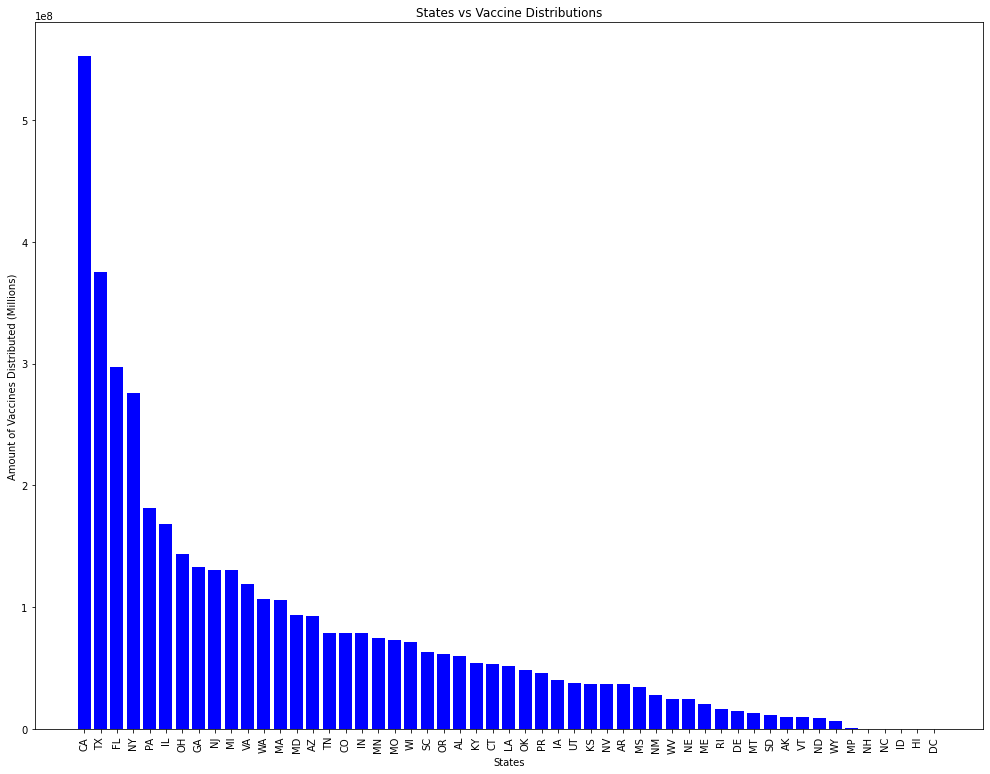

In [40]:
plt.figure(figsize=(17,13))
state_dist_admin.sort_values('Vaccine_Dist',inplace=True, ascending=False)
x_axis = state_dist_admin.index
y_axis = state_dist_admin['Vaccine_Dist']
plt.title("States vs Vaccine Distributions")
plt.bar(x_axis, y_axis, color="b", align="center")
plt.xticks(rotation=90)
plt.xlabel("States")
plt.ylabel("Amount of Vaccines Distributed (Millions)")

plt.savefig('States vs Vaccine Distributions.png')


<ipython-input-41-5fe6e282fa26>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_dist_admin.sort_values('Vaccine_Admin',inplace=True, ascending=False)


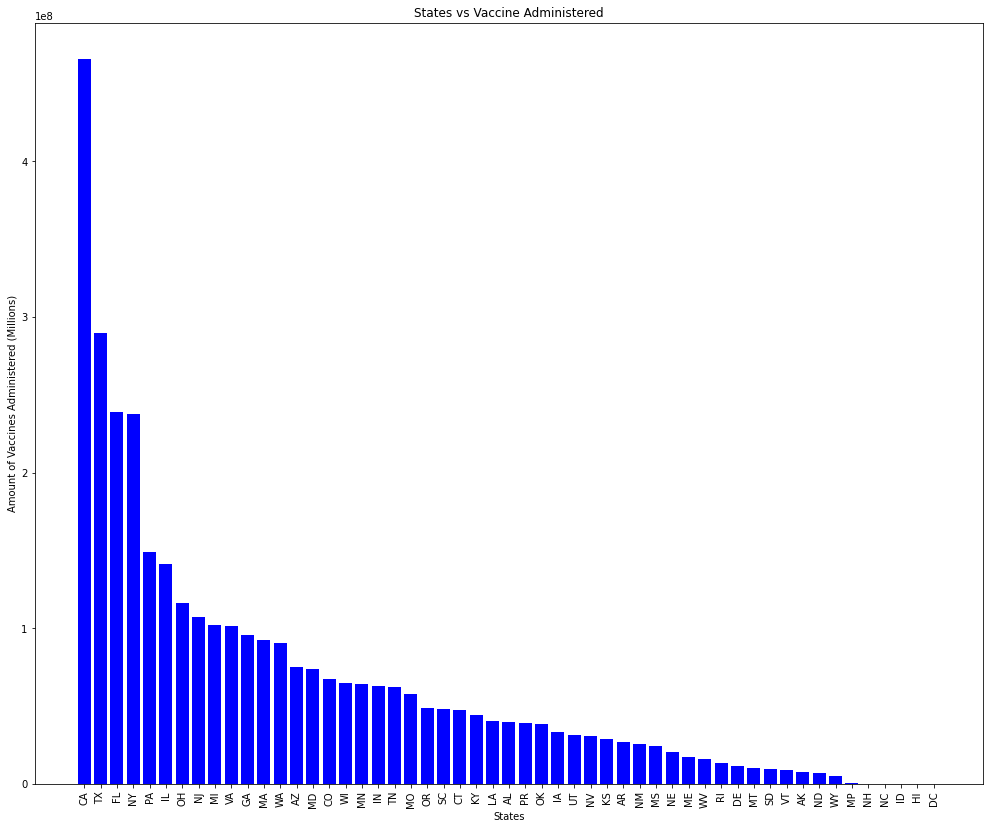

In [41]:
plt.figure(figsize=(17,14))
state_dist_admin.sort_values('Vaccine_Admin',inplace=True, ascending=False)
x_axis2 = state_dist_admin.index
y_axis2 = state_dist_admin['Vaccine_Admin']
plt.title("States vs Vaccine Administered")
plt.bar(x_axis2, y_axis2, color="b", align="center")
plt.xticks(rotation=90)
plt.xlabel("States")
plt.ylabel("Amount of Vaccines Administered (Millions)")

plt.savefig('States vs Vaccine Administered.png')


<Figure size 1800x1440 with 0 Axes>

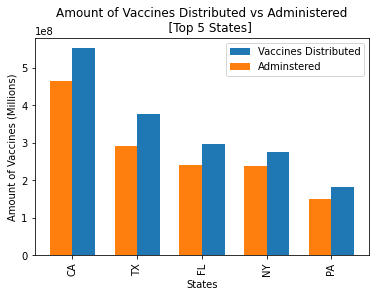

In [42]:
plt.figure(figsize=(25,20))

index = np.arange(len(state_dist_admin["Vaccine_Admin"].head()))
#x_axis3 = state_dist_admin.index
bar_width = 0.35

fig, ax = plt.subplots()

Distrib = ax.bar(index+bar_width, state_dist_admin["Vaccine_Dist"].head(),
                  bar_width, label="Vaccines Distributed")
Admin = ax.bar(index, state_dist_admin["Vaccine_Admin"].head(), bar_width,
                 label="Adminstered")



ax.set_xlabel('States')
ax.set_ylabel('Amount of Vaccines (Millions)')
ax.set_title('''Amount of Vaccines Distributed vs Administered
    [Top 5 States]''')
ax.set_xticks(index + bar_width / 2)
plt.xticks(rotation=90)
ax.set_xticklabels(['CA', 'TX', 'FL', 'NY', 'PA'])
ax.legend()

plt.savefig('Amount of Vaccines Distributed vs Administered')

# state_dist_admin

In [43]:

x = state_dist_admin["Vaccine_Admin"]
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

NameError: name 'N' is not defined

In [62]:
# ax = plt.gca()
# index2 = np.arange(len(state_dist_admin["Vaccine_Admin"]))
# ax.scatter(state_dist_admin["Vaccine_Admin"].head(53), index2, color="b")
# ax.scatter(final_monthly_data1_state_index_df2['Total_Deaths'].head(53), index2, color="r")

x_values = final_monthly_data1_df2['Monthly Vaccine Completed'].sum()
y_values = final_monthly_data1_df2['Monthly Deaths'].sum()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Normalized Blood Pressure')
plt.ylabel('1Y_Disease_Progress')
print(f"The r-squared is: {rvalue**2}")
plt.show()



TypeError: len() of unsized object

In [84]:
final_monthly_set2_df = final_monthly_set2_df[["Year-Month", "Population", "Total_Beds", "Current_Bed", 
                                               "%_Beds Used_By_Covid", "Total_ICU", "Current_ICU", 
                                               "%_ICU_Beds Used_By_Covid", "Vaccine_Int", "Vaccine_Complete", 
                                               "Add_Dose", "%_Pops w/ 1_Vaccine_Shot", "%_Pops w/ 2_Vaccine_Shots", 
                                               "%_Pops w/ Booster_Shot"]]

NameError: name 'final_monthly_set2_df' is not defined

In [82]:
x_values

1           0.0
2           0.0
3      163100.0
4       93464.0
5       31286.0
         ...   
684     11360.0
685     17224.0
686     13214.0
687      9735.0
688     11606.0
Name: Monthly Vaccine Completed, Length: 636, dtype: object